In [62]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import pandas as pd

In [63]:
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, InputLayer, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import tensorflow as tf

In [64]:
def preprocess(image):
  final_image=keras.applications.resnet50.preprocess_input(image)
  return final_image


In [65]:
train_datagen = ImageDataGenerator(validation_split = 0.2,preprocessing_function=preprocess)

In [66]:
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Shopee/train/train',
        subset = 'training',# this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=128,
        color_mode="rgb",
        class_mode="categorical",
        shuffle=True,
        seed=42) 


val_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Shopee/train/train',
        subset = 'validation',# this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=128,
        color_mode="rgb",
        class_mode="categorical",
        shuffle=True,
        seed=42) 


Found 70363 images belonging to 35 classes.
Found 17573 images belonging to 35 classes.


In [67]:
pd.DataFrame(train_generator[0][1])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
train_generator[0][0].shape

(128, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


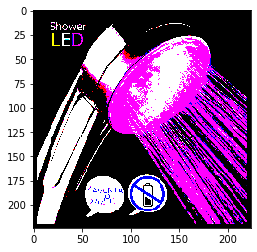

In [69]:
from matplotlib import pyplot as plt
plt.imshow(train_generator[0][0][0], interpolation='nearest')
plt.show()

In [70]:
base_model=keras.applications.resnet50.ResNet50(weights="imagenet",include_top=False)


In [71]:
avg=keras.layers.GlobalAveragePooling2D()(base_model.output)
output=keras.layers.Dense(35,activation="softmax")(avg)
model=keras.Model(inputs=base_model.input,outputs=output)

In [72]:
for layer in base_model.layers:
  layer.trainable=False

In [73]:
optimizer=keras.optimizers.SGD(lr=0.2,momentum=0.9,decay=0.01)
model.compile(loss="categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [74]:
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x7f8671be0e10>>

In [ ]:
history=model.fit(train_generator,epochs=5,validation_data=val_generator)

Epoch 1/5
100/550 [====>.........................] - ETA: 11:02:12 - loss: 13.4741 - accuracy: 0.5226